In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving BAJFINANCE.csv to BAJFINANCE (1).csv


In [ ]:
import io

In [ ]:
df = pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [ ]:
#This data is a time series used case, so anything in the data must be related to time series index, hence, we'll set our index
df.set_index('Date',inplace = True)

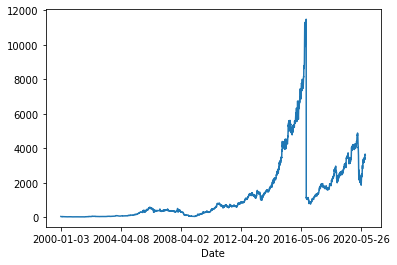

In [ ]:
df['VWAP'].plot() #this plot shows how the volume weighted average price has changed over time

In [ ]:
df.shape

(5070, 14)

In [ ]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [ ]:
df.shape


(2291, 14)

In [ ]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2.285000e+03,2285.000000,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2.285000e+03,2.285000e+03,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2.285000e+03,2.285000e+03,2.285000e+03,2285.000000,2285.000000
mean,2633.351072,2634.941597,2676.817768,2590.544114,2634.900591,2634.599300,2634.840543,1.099476e+06,2.864095e+14,47228.045077,2.722712e+05,0.527186,2675.464923,2672.804811,2589.269854,2586.682313,1.096376e+06,1.090947e+06,2.852868e+14,2.833198e+14,47122.734209,46939.502720,41.056412,71.302024,42.692237,71.181043,3.251555e+05,4.143616e+05,8.309771e+13,1.075346e+14,12669.633084,16064.433710
std,1953.318359,1952.291595,1980.915982,1922.032261,1953.154295,1952.952464,1952.233322,2.556262e+06,6.996002e+14,101619.442904,4.590013e+05,0.230515,1975.204368,1966.582566,1916.488970,1908.011531,2.466208e+06,2.402612e+06,6.728691e+14,6.514399e+14,98380.343658,96208.622632,184.950610,256.305197,179.213480,249.305234,7.396450e+05,8.170615e+05,2.107681e+14,2.389582e+14,28004.205040,30660.147379
min,566.100000,560.000000,572.000000,553.800000,566.000000,566.100000,566.550000,1.030000e+02,8.871925e+09,21.000000,5.000000e+01,0.057500,581.916667,587.492857,561.533333,565.378571,2.063000e+03,2.844143e+03,1.569302e+11,2.468778e+11,128.000000,185.000000,0.000000,2.356854,0.057735,3.168840,1.514409e+02,7.564945e+02,1.313676e+10,6.731615e+10,21.385353,31.911335
25%,1253.700000,1260.000000,1278.000000,1240.100000,1255.000000,1255.950000,1256.990000,2.183600e+04,3.665695e+12,1541.000000,1.515300e+04,0.337800,1280.433333,1278.057143,1240.500000,1241.350000,2.736833e+04,2.894886e+04,4.493354e+12,5.059696e+12,1771.333333,1952.857143,9.590925,19.701622,10.252926,19.551872,1.171334e+04,1.878307e+04,2.259425e+12,3.581556e+12,662.009063,1077.452396
50%,1923.600000,1926.000000,1950.550000,1901.000000,1926.000000,1924.650000,1923.620000,8.936300e+04,3.965502e+13,9689.000000,5.875800e+04,0.534500,1949.850000,1944.407143,1897.350000,1894.192857,8.694367e+04,8.321100e+04,4.313847e+13,4.364545e+13,10036.333333,10439.142857,20.502459,35.891392,21.654118,37.831865,4.620963e+04,6.238601e+04,1.343517e+13,1.984621e+13,3152.550079,4591.148980
75%,3459.400000,3465.500000,3519.000000,3405.050000,3460.000000,3463.300000,3466.510000,1.106624e+06,2.531621e+14,49055.000000,3.549980e+05,0.715000,3511.650000,3512.228571,3420.083333,3419.285714,1.127147e+06,1.166139e+06,2.640982e+14,2.679506e+14,49355.000000,48709.857143,40.333020,68.152145,45.804667,70.670071,2.958046e+05,4.141084e+05,6.560856e+13,8.843030e+13,11684.796333,15848.698568
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,979111.000000,3.690656e+06,0.989500,11439.666667,11212.800000,11183.033333,10926.264286,2.035496e+07,1.722802e+07,6.662866e+15,5.308563e+15,692406.000000,580591.142857,6097.542705,5502.253850,5878.510271,5397.721540,9.567944e+06,7.226047e+06,3.270639e+15,2.469906e+15,378260.406694,277194.812804


In [ ]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3 #window size of 3 days
window2 = 7 #window size of 7 days

In [ ]:
#we'll iterate then we'll apply the rolling concept and moving average concept


for feature in lag_features:
  df[feature + 'rolling_mean_3'] = df[feature].rolling(window = window1).mean() 
  df[feature + 'rolling_mean_7'] = df[feature].rolling(window = window2).mean() 



  #applying the rolling concept with the window period of 3 days(stored as window1) and finding its mean
  #applying the rolling concept with the window period of 7 days(stored as window2) and finding its mean

In [ ]:
for feature in lag_features:
  df[feature + 'rolling_std_3'] = df[feature].rolling(window = window1).std() 
  df[feature + 'rolling_std_7'] = df[feature].rolling(window = window2).std() 

  #Everything being same here, only standard deviation is calculated instead of mean



In [ ]:
df.head() #new columns(fetaures) have been added in our dataframe or dataset


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [ ]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [ ]:
df.shape

(2291, 34)

In [ ]:
df.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
dtype: int64

In [ ]:
independent_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

#These are the independent features which is going to be used for training purposes

In [ ]:
training_data = df[0:1800] #for training purpose we'll use first 1800 rows
testing_data = df[1800:] #for testing we'll use from 1800 rows to the last road

In [ ]:
pip install pmdarima #installing the arima model

In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(y = training_data['VWAP'], exogenous = training_data[independent_features], trace = True) 
#y takes the dependent feature which has to be predicted
#exogenous takes the independent feature 
#trace = True implements the best pdq values automatically

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.534, Time=6.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.222, Time=3.56 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.346, Time=3.70 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.318, Time=5.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=3.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.232, Time=5.44 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 27.892 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [ ]:
#The lower the AIC the better the model
#see the best arima model in which: (0,0,0) is p, (0,0,0) is d, [0] is q

In [ ]:
model.fit(training_data['VWAP'], training_data[independent_features]) #the dependent and independent data is passed, nothing fancy!!

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:

forecast = model.predict(n_periods = len(testing_data), exogenous = testing_data[independent_features])

#n_periods is taken to be the length of test data
#exogenous is taken as the testing data of ind features as prediction has to be done

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
testing_data['forecast_ARIMA'] = forecast #we have assigned the above predicted values to the testing data column named as forecast_ARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


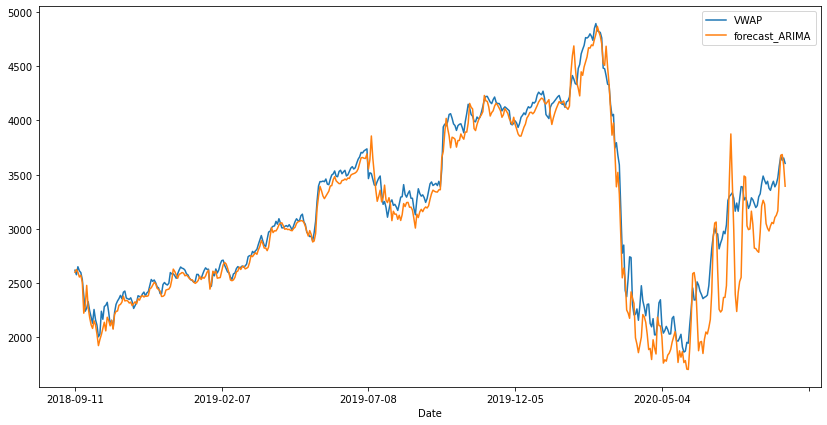

In [ ]:
testing_data[['VWAP','forecast_ARIMA']].plot(figsize = (14,7)) #plotting the actual values(vwap) and the predicted values(forecast_ARIMA) trend
#the predicted(orange) curve is very close and kinda same as the actual curve(blue), this states the we have predicted very accurately and a good model is built

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(testing_data['VWAP'], testing_data['forecast_ARIMA'])) #root mean squared error

187.82948880630076

In [ ]:
mean_absolute_error(testing_data['VWAP'], testing_data['forecast_ARIMA']) 

124.68829484488094